In [1]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
import numpy as np
import cv2
from stardist.models import StarDist2D
import os

model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [103]:
path = "C:/Users/Modern/Desktop/Science stuff from the USB/21-12-2022 Spheroids/48H Glycerol/Image/16.tif"
mylist = []
loaded,layers = cv2.imreadmulti(mats = mylist, filename = path, flags = cv2.IMREAD_ANYCOLOR )
z,x,y,c = np.shape(layers)


In [104]:
labels = np.empty([z,x,y])
i = 0


for l in layers:
    image = l[:,:,1]
    label, _ = model.predict_instances(normalize(image))
    labels[i,:,:] = label
    i = i+1

1/1 [==============================] - 0s 175ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'prediction + input overlay')

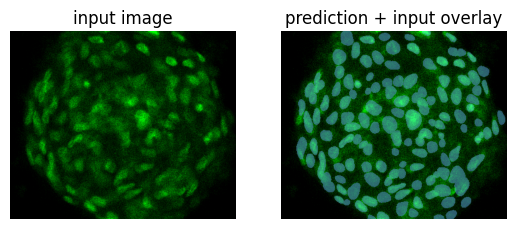

In [105]:

mid_z = round(z/2)

plt.subplot(1,2,1)
plt.imshow(layers[mid_z], cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels[mid_z], layers[mid_z]))
plt.axis("off")
plt.title("prediction + input overlay")



In [111]:
folder_path = "C:/Users/Modern/Desktop/Science stuff from the USB/21-12-2022 Spheroids/48H Glycerol/Image/16_label/"

n = 0
for l in labels:
    save_path = folder_path + str(n) + ".png"
    cv2.imwrite(save_path,l)
    n = n+1

In [109]:
save_path = "C:/Users/Modern/Desktop/Science stuff from the USB/21-12-2022 Spheroids/48H Glycerol/Image/16_labels.tiff"

cv2.imwritemulti(save_path,labels)

True